In [0]:
import os
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense, Reshape, Input,Dropout
import keras
import tensorflow as tf
import cv2

Using TensorFlow backend.


In [0]:
def link_net(input_size = (32,32,1),descr=1,activation='sigmoid'):
    #descr=2
    inputs = Input(input_size)
    conv1 = keras.layers.Conv2D(int(64/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = keras.layers.Conv2D(int(64/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = keras.layers.Conv2D(int(128/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = keras.layers.Conv2D(int(128/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = keras.layers.Conv2D(int(256/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = keras.layers.Conv2D(int(256/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = keras.layers.Conv2D(int(512/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = keras.layers.Conv2D(int(512/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = keras.layers.Dropout(0.5)(conv4)
    pool4 = keras.layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = keras.layers.Conv2D(int(1024/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = keras.layers.Conv2D(int(1024/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = keras.layers.Dropout(0.5)(conv5)

    up6 = keras.layers.Conv2D(int(512/descr), 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(keras.layers.UpSampling2D(size = (2,2))(drop5))
    merge6 = keras.layers.add([drop4,up6])
    conv6 = keras.layers.Conv2D(int(512/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = keras.layers.Conv2D(int(512/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = keras.layers.Conv2D(int(256/descr), 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(keras.layers.UpSampling2D(size = (2,2))(conv6))
    merge7 = keras.layers.add([conv3,up7])
    conv7 = keras.layers.Conv2D(int(256/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = keras.layers.Conv2D(int(256/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = keras.layers.Conv2D(int(128/descr), 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(keras.layers.UpSampling2D(size = (2,2))(conv7))
    merge8 = keras.layers.add([conv2,up8])
    conv8 = keras.layers.Conv2D(int(128/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = keras.layers.Conv2D(int(128/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = keras.layers.Conv2D(int(64/descr), 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(keras.layers.UpSampling2D(size = (2,2))(conv8))
    merge9 = keras.layers.add([conv1,up9])
    conv9 = keras.layers.Conv2D(int(64/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = keras.layers.Conv2D(int(64/descr), 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

    conv10 = keras.layers.Conv2D(2, 3, padding = 'same',activation = activation)(conv9)

    model = Model(input = inputs, output = conv10)
    
    model.summary()

    return model

In [0]:
model=link_net(input_size=(256,256,3),descr=8,activation='sigmoid')
model.compile('adam',loss='binary_crossentropy',metrics=['acc'])
model.save('/content/u_net_seg.h5.h5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  224         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 8)  584         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 8)  0           conv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


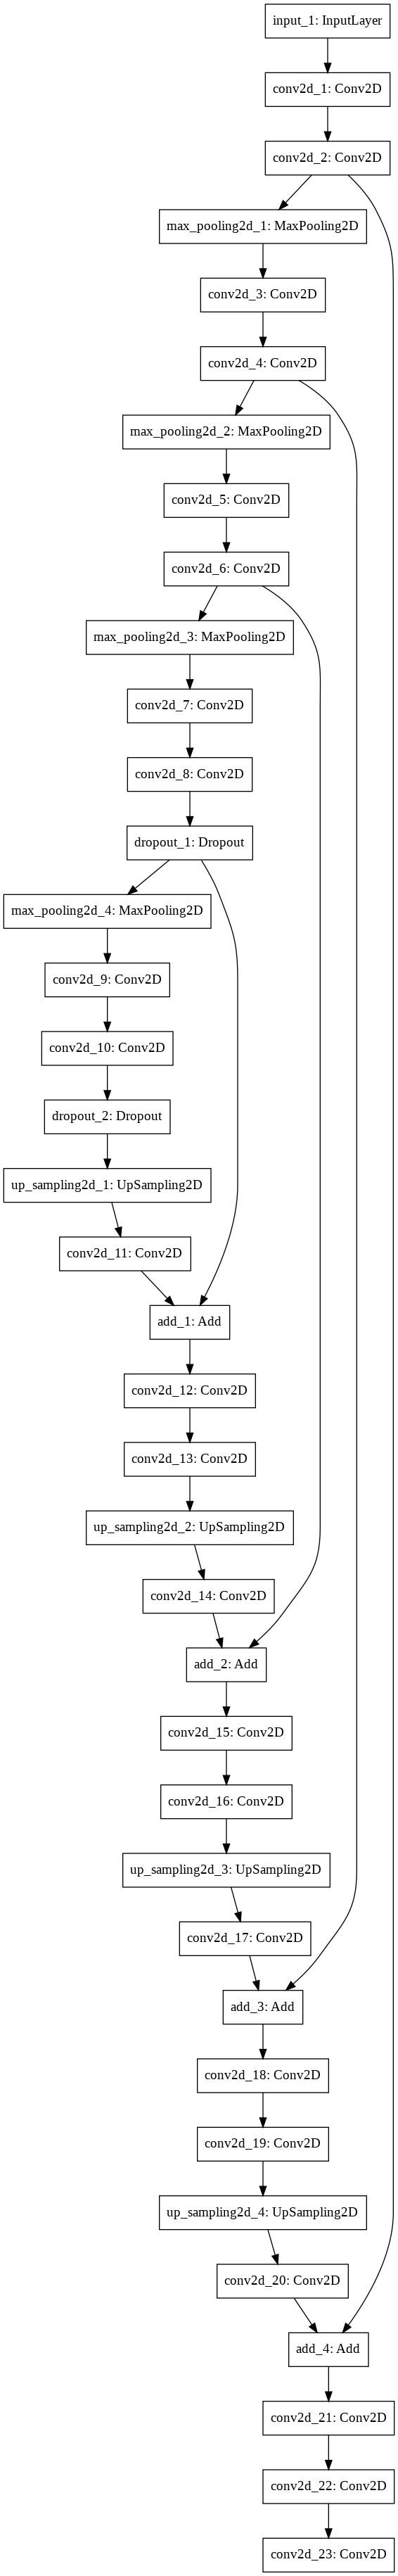

In [0]:
tf.keras.utils.plot_model(model)

In [0]:
#important
pip install tf-nightly
#restart runtime then start with cell down below

In [0]:
# converter is asking for represantative_dataset to convert in int8 format
#sample data for rep_data_gen is here for segmentation https://drive.google.com/open?id=1JWc9s1-b3DyJioEbot3PDjMTtJFEqCn-
#for ocr https://drive.google.com/open?id=1Hu6PZAb12OfaEmP23tnRz7JoeG3jO2LI
import os
import cv2
import numpy as np
import tensorflow as tf
# upload sample data
img_dir = '/content/data/'
path = os.listdir(img_dir)
def rep_data_gen():
    a = []
    for file_name in path:
        img = cv2.imread(img_dir + file_name)
        img = cv2.resize(img, (256, 256))
        img = img / 255
        img = img.astype(np.float32)
        a.append(img)
    a = np.array(a)
    img = tf.data.Dataset.from_tensor_slices(a).batch(1)
    for i in img.take(1):
        #print(i)
        yield [i]

In [0]:
#important to use tf nightly 

converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file('your_model_name.h5')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.representative_dataset = rep_data_gen
tflite_model= converter.convert()
tflite_model_name = "your_tflite_int8_model_name.tflite"
open(tflite_model_name, "wb").write(tflite_model)